* infrequent tourist
* experience seekers/influencers
* high spend occasional shoppers

* age group, 25-40, 41-59, 60+

things to look into when 


**PERSONA DRAFTS**

**EDGE PERSONAS** -- what are each of their motivation
* seekers/influencers
* xx
* a


## 0. System Setup + some Cleaning

In [48]:
#QUESTION BANK
Q3 = "Are you familiar with the West Side Market?"
Q4 = "What is your Zip Code?"
Q5 = "What is your age group?"
Q6 = "West Side Market background information (shown if respondent is unfamiliar)"
Q7 = "How do you typically travel to the market?"
Q8 = "How often do you visit the West Side Market?"
Q9 = "When was the last time you visited the West Side Market?"
Q10 = "What is your impression of the West Side Market given what you have heard about it?"
Q11 = "On average, how much do you spend per visit?"
Q12 = "When shopping at the West Side Market, do you typically explore different stalls or go directly to specific vendors?"
Q13 = "How satisfied are you with the following?"
Q14 = "Elaborate on reasons for dissatisfaction"
Q15 = "Have you visited other public markets in Cleveland or elsewhere? And if so, which ones?"
Q16 = "What makes you want to shop at a public market? Select all that apply."
Q17 = "What do you like or dislike about the other public markets you have been to?"
Q18 = "What brings you to the West Side Market? What motivates you to come back? Select all that apply."
Q19 = "What are the reasons you do not visit the West Side Market more often or at all?"
Q22 = "How interested would you be in the following at the West Side Market?"
Q23 = "Is there anything else you would like to see at the market?"
Q24 = "Which days of the week are best for you to visit the West Side Market?"
Q25 = "Would you be interested in volunteer or donor opportunities with the West Side Market?"
Q26 = "Notable positive or negative interactions with vendors"
Q27 = "Notable positive or negative experiences with products"
Q28 = "Anything else you would like to share relating to the West Side Market?"
Q29 = "How often do you use grocery delivery services? (Instacart, Amazon, etc.)"
Q30 = "Where do you shop for groceries?"
Q31 = "Where do you get prepared foods?"
Q32 = "How do you hear about local products, events, or news?"
Q33 = "What is your household size?"
Q34 = "What is your household income?"
Q35 = "What is your gender?"
Q36 = "What is your race?"
Q37 = "Enter your email to be entered into the $50 Visa Gift Card drawing"
Q38 = "Are you willing to be contacted if we have questions about the responses?"


In [45]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import textwrap
def wrap_labels(labels, width=14):
    return ['\n'.join(textwrap.wrap(l, width)) for l in labels]

q3_key = {1: "I've been there", 2:"I've heard of it but have not  been there", 3:"I've never heard of it and have not been there"}
q5_key={1:"Under 18",2:"18-20",3:"21-24",4:"25-40",5:"41-59",6:"60+"}
q7_key={1:"Driving",2:"Public transit",3:"Walking",4:"Shuttle/Tours",5:"Bike/Scooter"}
q8_key={1:"Once a year or less", 2:"A few times a year", 3:"Monthly",4:"Weekly or more"}
q9_key={1:"Within the last week",2:"Within the last month",3:"Within the last year",4:"More than a year ago"}
q11_key={1:'Less than $20',2:"$20-50",3:"$50-100",4:"More than $100"}
q12_key={1:"Explore different stalls",2:"Specific Vendors only",3:"Both"}
q19_key={1:"Too hard to park",2:"I don't live in Cleveland",3:"Market hours don't fit my schedule", 4:"Prices are too high",5:"Inconvenient location",6:"I don't always know what's available at the West Side Market",7:"Prefer supermarkets or other markets",8:"Not enough prepared food",9:"Not enough seating option",10:"Market feels too crowded or hectic",11:"Other"}
q13_key={1:"Extremely dissatisfied",2:"Somewhat dissatisfied",3:"Neither satisfied nor dissatisfied",4:"Somewhat satisfied",5:"Extremely satisfied"}
q15_18_key={1:"Product Variety",2:"Tradition and trust in vendors",3:"Value for money",4:"Availability of fresh or specialty itens I cannot find elsewhere",5:"Supporting local or independent businesses",6:"Unique Atmosphere",7:"Prepared food",8:"Attending an event or tour",9:"Other"}
q22_key={1:"Litte Interest",2:"Medium Interest",3:"High Interest"}
q24_key={1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday",8:"I have no preference"}
q29_30_31_key={1:"Usually",2:"Sometimes",3:"Rarely",4:"Never"}
q32_key={1:"Facebook",2:"Instagram",3:"Tiktok",4:"Newspaper",5:"Eventbrite",6:"Meetup",7:"Google listings",8:"Word of mouth",9:"Physical advertising",10:"Others"}
q33_key={1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7+',8:"Prefer not to say"}
q34_key={
    1:"Less than $25,000",
    2:"$25,000-$49,999",
    3:"$50,000-$99,999",
    4:"$100,000-$149,999",
    5:"$150,000-$199,999",
    6:"$200,000-$249,999",
    7:"$250,000+",
    8:"Prefer not to say"
}
q39_key={1:"Male",2:"Female",3:"Other",4:"Prefer not to say"}
q36_key={1:"African American",2:"White/Caucasian",3:"Hispanic",4:"Asian",5:"Pacific Islander",6:"Other",7:"Prefer not to say"}
#q13 can be split into: Product Variety, Cleanliness, Vendor Interactions, Parking/Accessibility, Value for Money

numeric_cols=['']

In [26]:
# --- Load data ---
df_0 = pd.read_csv("survey.csv")

#Make supposed numeric data as numeric
non_numeric_cols = ["ResponseId","DistributionChannel","Q10","Q14","Q15_2_TEXT","Q16_9_TEXT","Q17","Q18_9_TEXT","Q19_10_TEXT","Q23","Q26","Q27","Q28","Q37","Q32_12_TEXT","Q21_9_TEXT","channel"]
numeric_cols = [col for col in df_0.columns if col not in non_numeric_cols]
df = df_0.copy()
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
#Drop first 2 rows; these contain only descriptions of the column and not the actual data.
df = df.iloc[2:].reset_index(drop=True)
#Drop unncessary columns
df = df.drop(columns=["Progress","IPAddress","Duration (in seconds)","Finished","ResponseId"])
df.rename(columns={'Q3_1':'Q3_Product Variety','Q3_2':'Q3_Cleanliness','Q3_3':'Q3_Vendor Interactions','Q3_4':'Q3_Parking/Accessibility','Q3_5':'Q3_Value for Money'},inplace=True)
df.rename(columns={
    'Q22_1': "Q22_Live Music",
    'Q22_2': "Q22_Seasonal food festivals",
    'Q22_3': "Q22_Cooking/Nutrition classes & demos",
    'Q22_4': "Q22_Family-friendly events",
    'Q22_5': "Q22_Evening happy hours",
    'Q22_6': "Q22_Cultural celebrations",
    'Q22_7': "Q22_Loyalty/Rewards Program",
    'Q22_8': "Q22_Meal/grocery delivery service"
}, inplace=True)
df.rename(columns={'Q30_1':"Q30_Walmart",'Q30_2':"Q30_Aldi",'Q30_3':"Q30_Giant Eagle",'Q30_4':"Q30_Heinen's",'Q30_5':"Q30_Dave's",'Q30_6':"Q30_Farmers' markets",'Q30_7':"Q30_West Side Market",'Q30_8':"Q30_Fairfax Market"},inplace=True)
df.rename(columns={
    'Q31_1':"Q31_Restaurants/takeout",
    'Q31_2':"Q31_Meal Delivery Services",
    'Q31_3':"Q31_Preferred grocery store",
    'Q31_4':"Q31_West Side Market",
    'Q31_5':"Q31_Meal prep services"
}, inplace=True)



# 1. Geographic profile of respondents
**ZIP code distribution**
* Frequency table of Zip Code (Q4).
* Top 10 ZIP codes, plus “Other”.
* Map ZIPs to “Cleveland vs suburban vs out-of-state” if you want.

**ZIP/Region/Distance from West Side Market vs**:
* Frequency of visit (Q8).
* Last visit recency (Q9).
* Typical spend per visit (Q11).
* Travel mode (Q7).

In [27]:
#Mark Missing ZIP Codes as "MISSING"
df['Q4'] = (
    df['Q4'].astype(str).str.extract(r'(\d{5})')[0].fillna("MISSING")
)
df['ZIP_clean'] = (
    df['Q4'].astype(str).str.extract(r'(\d{5})')[0].fillna("MISSING")
)

df.head()
# --- Region mapping (Cleveland vs suburban vs out-of-state) ---
cleveland_zips = {
    "44102","44113","44109","44144","44107","44114","44115","44106","44105",
    "44111","44103","44110","44104","44108","44112","44120"
}

# df['ZIP_clean']

ohio_zips = {str(z).zfill(5) for z in range(43000, 46000)}

def classify_region(zipcode):
    if zipcode in cleveland_zips:
        return "Cleveland"
    elif zipcode in ohio_zips:
        return "Ohio (Suburban)"
    elif zipcode == "MISSING":
        return "Missing"
    else:
        return "Out-of-state"

df['Region'] = df['ZIP_clean'].apply(classify_region)

# --- Cleveland ZIP → Neighborhood mapping ---
zip_to_neighborhood = {
    "44102": "Detroit–Shoreway / Cudell",
    "44113": "Ohio City / Tremont / Clark-Fulton",
    "44109": "Old Brooklyn",
    "44144": "Brooklyn / Linndale",
    "44107": "Lakewood",
    "44114": "Downtown / Asiatown",
    "44115": "Downtown Cleveland",
    "44106": "University Circle / Little Italy",
    "44105": "Slavic Village",
    "44111": "West Park / Kamm’s Corners",
    "44103": "Hough / St. Clair–Superior",
    "44110": "Collinwood",
    "44104": "Central / Kinsman",
    "44108": "Glenville",
    "44112": "East Cleveland",
    "44120": "Shaker Square / Buckeye-Woodhill / Shaker Heights"
}

def map_neighborhood(zipcode):
    if zipcode in zip_to_neighborhood:
        return zip_to_neighborhood[zipcode]
    elif zipcode == "MISSING":
        return "Missing ZIP"
    elif zipcode in ohio_zips:
        return "Ohio Suburb"
    else:
        return "Out-of-state"

df['ZIP_neighborhood'] = df['ZIP_clean'].apply(map_neighborhood)

# --- Frequency of neighborhoods (exclude Missing ZIP) ---
nh_counts = (
    df[df['ZIP_neighborhood'] != "Missing ZIP"]['ZIP_neighborhood']
    .value_counts()
    .reset_index()
)
nh_counts.columns = ['Neighborhood', 'count']

# Top 10 neighborhoods
top10_neighborhoods = nh_counts.head(10)['Neighborhood'].tolist()

# --- Neighborhood bucket column ---
df['Neighborhood_bucket'] = df['ZIP_neighborhood'].apply(
    lambda n: n if n in top10_neighborhoods else "Other"
)

# --- Missing ZIP count ---
missing_zip_count = (df['ZIP_neighborhood'] == "Missing ZIP").sum()

# ======================================================
# OUTPUTS
# ======================================================

print("Top 10 ZIP Neighborhoods:")
display(nh_counts.head(10))

print(f"\nMissing ZIP count: {missing_zip_count}")

print("\nNeighborhood Bucket Counts (Top 10 + Other):")
display(df['Neighborhood_bucket'].value_counts().reset_index())

print("\nRegions:")
display(df['Region'].value_counts().reset_index())


Top 10 ZIP Neighborhoods:


,Neighborhood,count
0,Ohio Suburb,377
1,University Circle / Little Italy,78
2,Lakewood,40
3,Ohio City / Tremont / Clark-Fulton,32
4,Out-of-state,28
5,Detroit–Shoreway / Cudell,24
6,Old Brooklyn,24
7,West Park / Kamm’s Corners,20
8,Brooklyn / Linndale,10
9,Shaker Square / Buckeye-Woodhill / Shaker Heights,8



Missing ZIP count: 29

Neighborhood Bucket Counts (Top 10 + Other):


,Neighborhood_bucket,count
0,Ohio Suburb,377
1,University Circle / Little Italy,78
2,Other,43
3,Lakewood,40
4,Ohio City / Tremont / Clark-Fulton,32
5,Out-of-state,28
6,Detroit–Shoreway / Cudell,24
7,Old Brooklyn,24
8,West Park / Kamm’s Corners,20
9,Brooklyn / Linndale,10



Regions:


,Region,count
0,Ohio (Suburban),377
1,Cleveland,250
2,Missing,29
3,Out-of-state,28


## Distance from WSM (for later)
**Haversine Formula**
The Earth is curved, so straight-line Euclidean distance is inaccurate. The Haversine formula instead calculates great-circle distance, which is the shortest path between two points on the surface of a sphere.

In [28]:
# West Side Market coordinates
WSM_LAT = 41.4840
WSM_LON = -81.7031

def haversine(lat1, lon1, lat2=WSM_LAT, lon2=WSM_LON):
    """
    Calculate distance in miles using Haversine formula.
    """
    R = 3958.8  # Earth radius in miles

    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = (math.sin(dlat/2)**2 +
         math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2)

    c = 2 * math.asin(math.sqrt(a))

    return R * c

In [29]:
df['distance_miles'] = df.apply(
    lambda r: haversine(r['LocationLatitude'], r['LocationLongitude'])
    if pd.notnull(r['LocationLatitude']) and pd.notnull(r['LocationLongitude'])
    else None,
    axis=1
)

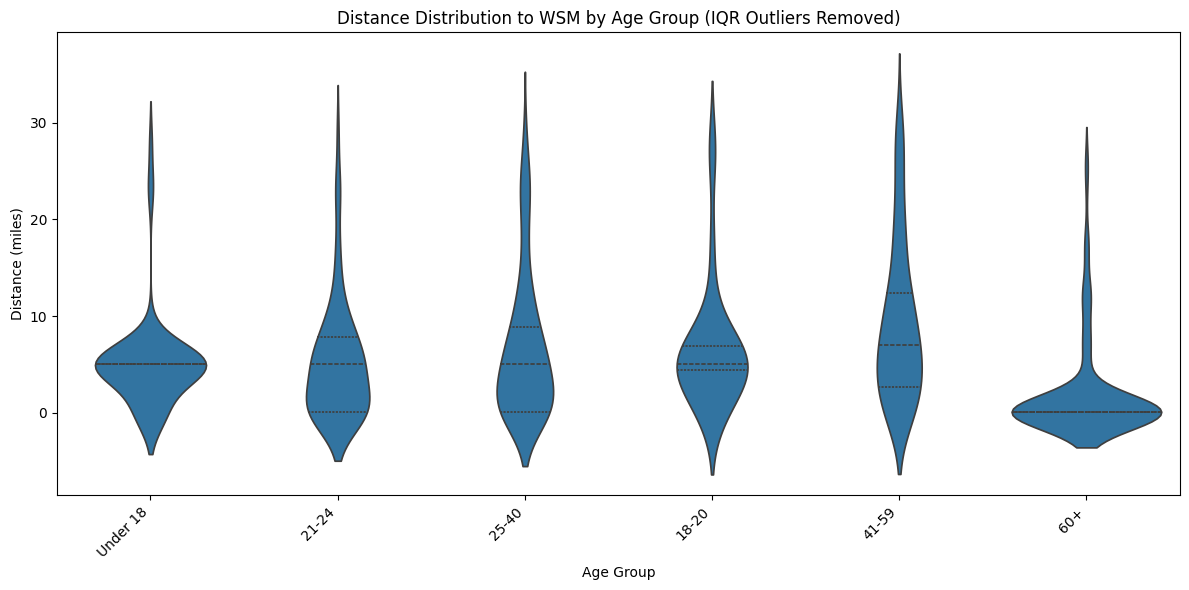

In [30]:
# Compute IQR boundaries for distance outliers
Q1 = df['distance_miles'].quantile(0.25)
Q3 = df['distance_miles'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset
df_no_outliers = df[(df['distance_miles'] >= lower_bound) &
                    (df['distance_miles'] <= upper_bound)]

# Violin plot without outliers
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df_no_outliers,
    x=df_no_outliers['Q5'].map(q5_key),
    y=df_no_outliers['distance_miles'],
    inner="quartile"
)
plt.xticks(rotation=45, ha='right')
plt.title("Distance Distribution to WSM by Age Group (IQR Outliers Removed)")
plt.xlabel("Age Group")
plt.ylabel("Distance (miles)")
plt.tight_layout()
plt.show()

# 2. Awareness & Familiarity
**Are you familiar with the West Side Market? (Q3)**
* Proportion familiar vs not familiar.
* Compare familiarity vs:
    * Impressions (Q10).
    * Visit frequency (Q8).
    * Reasons for not visiting (Q19).
    * Age group (Q5).
    * Student vs non-student (Q20).
    * Distance from the market (`df['distance_miles]`) or region (`df[ZIP_neighborhood]`)

**Impression of the market (Q10)**
* Distribution (Very negative → Very positive).
* Compare impression vs:
    * Satisfaction metrics (Q13_1–Q13_5).
    * Visit frequency & last visit.
    * Typical spend.

**If Q3=2,3, see which age groups are not going and why(Q9)**


1: "I've been there", 2:"I've heard of it but have not  been there", 3:"I've never heard of it and have not been there"

Familiarity (Q3) vs Region/Neighborhood (ZIP_neighborhood) Cross-tabulation:


ZIP_neighborhood,Brooklyn / Linndale,Detroit–Shoreway / Cudell,Downtown / Asiatown,Downtown Cleveland,Glenville,Hough / St. Clair–Superior,Lakewood,Missing ZIP,Ohio City / Tremont / Clark-Fulton,Ohio Suburb,Old Brooklyn,Out-of-state,Shaker Square / Buckeye-Woodhill / Shaker Heights,Slavic Village,University Circle / Little Italy,West Park / Kamm’s Corners
I've been there,10,24,3,1,2,3,40,21,32,357,24,23,8,5,48,20
I've heard of it but have not been there,0,0,0,0,0,0,0,6,0,17,0,3,0,0,21,0
I've never heard of it and have not been there,0,0,0,0,0,0,0,2,0,3,0,2,0,0,9,0



Column percentages (by Region/Neighborhood):


ZIP_neighborhood,Brooklyn / Linndale,Detroit–Shoreway / Cudell,Downtown / Asiatown,Downtown Cleveland,Glenville,Hough / St. Clair–Superior,Lakewood,Missing ZIP,Ohio City / Tremont / Clark-Fulton,Ohio Suburb,Old Brooklyn,Out-of-state,Shaker Square / Buckeye-Woodhill / Shaker Heights,Slavic Village,University Circle / Little Italy,West Park / Kamm’s Corners
I've been there,100.0,100.0,100.0,100.0,100.0,100.0,100.0,72.41,100.0,94.69,100.0,82.14,100.0,100.0,61.54,100.0
I've heard of it but have not been there,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.69,0.0,4.51,0.0,10.71,0.0,0.0,26.92,0.0
I've never heard of it and have not been there,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.90,0.0,0.80,0.0,7.14,0.0,0.0,11.54,0.0


<Figure size 1400x600 with 0 Axes>

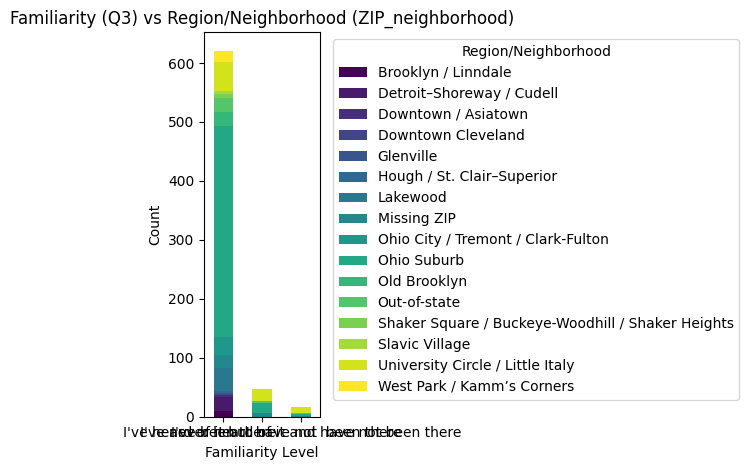

<Figure size 1400x600 with 0 Axes>

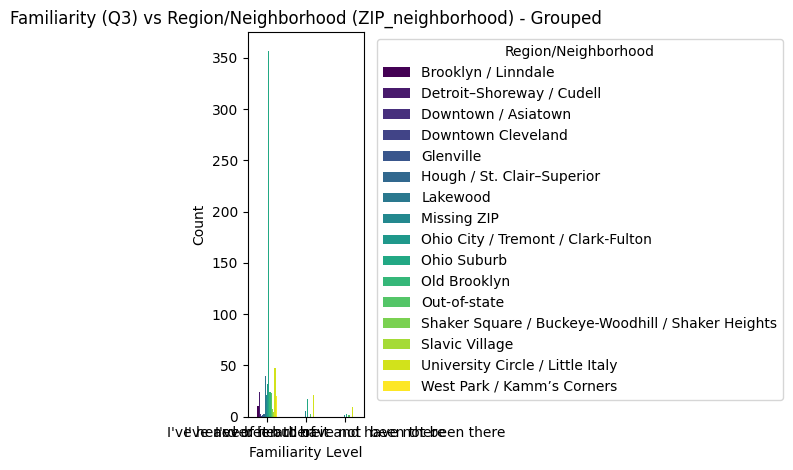

In [47]:
# 2. Awareness & Familiarity - Compare Familiarity vs Region (ZIP_neighborhood)

# Create cross-tabulation of Q3 (Familiarity) vs ZIP_neighborhood
q3xregion = df.pivot_table(index='Q3', columns='ZIP_neighborhood', aggfunc='size', fill_value=0)

# Rename rows with Q3 labels
q3xregion.index = [q3_key[i] for i in q3xregion.index]

# Display the cross-tabulation
print("Familiarity (Q3) vs Region/Neighborhood (ZIP_neighborhood) Cross-tabulation:")
display(q3xregion)

# Calculate proportions by region (column percentages)
q3xregion_pct = q3xregion.div(q3xregion.sum(axis=0), axis=1) * 100
print("\nColumn percentages (by Region/Neighborhood):")
display(q3xregion_pct.round(2))

# Visualize with stacked bar chart
plt.figure(figsize=(14, 6))
q3xregion.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Familiarity (Q3) vs Region/Neighborhood (ZIP_neighborhood)")
plt.ylabel("Count")
plt.xlabel("Familiarity Level")
plt.xticks(rotation=0)
plt.legend(title='Region/Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Also create a grouped bar chart for better comparison
plt.figure(figsize=(14, 6))
q3xregion.plot(kind='bar', colormap='viridis')
plt.title("Familiarity (Q3) vs Region/Neighborhood (ZIP_neighborhood) - Grouped")
plt.ylabel("Count")
plt.xlabel("Familiarity Level")
plt.xticks(rotation=0)
plt.legend(title='Region/Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


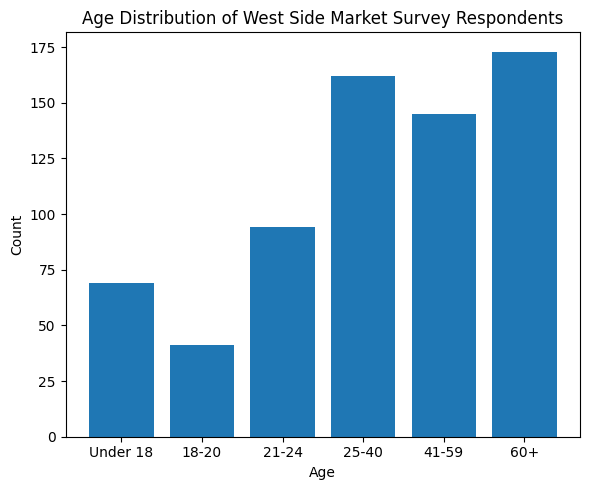

In [31]:
q5_counts = df['Q5'].value_counts().sort_index()
labels = [q5_key[i] for i in q5_counts.index]
# Wrap long labels
wrapped = wrap_labels(labels, width=14)

plt.figure(figsize=(6,5))
plt.bar(wrapped, q5_counts.values)
plt.title("Age Distribution of West Side Market Survey Respondents")
plt.ylabel("Count")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

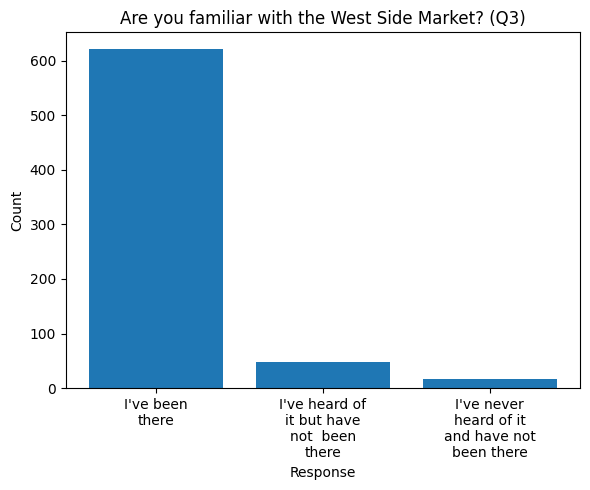

In [32]:
q3_counts = df['Q3'].value_counts().sort_index()
labels = [q3_key[i] for i in q3_counts.index]
# Wrap long labels
wrapped = wrap_labels(labels, width=14)

plt.figure(figsize=(6,5))
plt.bar(wrapped, q3_counts.values)
plt.title("Are you familiar with the West Side Market? (Q3)")
plt.ylabel("Count")
plt.xlabel("Response")
plt.tight_layout()
plt.show()

In [33]:
print(df['Q3'].value_counts(dropna=False))

Q3
1.0    621
2.0     47
3.0     16
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

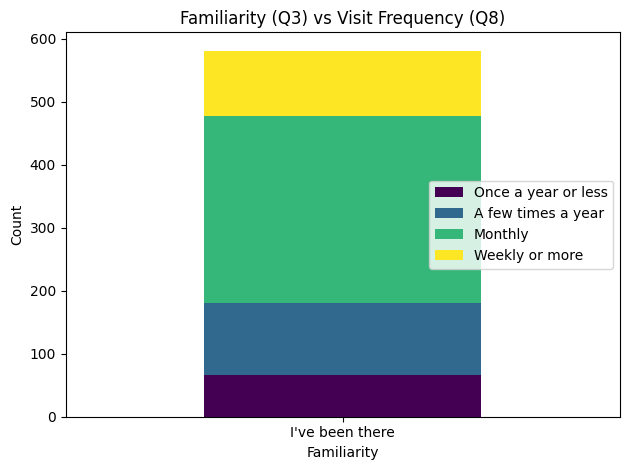

In [34]:
# Pivot using numeric codes
q3xq8 = df.pivot_table(index='Q3', columns='Q8', aggfunc='size', fill_value=0)

# Rename rows & columns with the key dicts
q3xq8.index = [q3_key[i] for i in q3xq8.index]      # Q3 familiarity labels
q3xq8.columns = [q8_key[i] for i in q3xq8.columns]  # Q8 visit frequency labels

# Plot 
plt.figure(figsize=(8,5))
q3xq8.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Familiarity (Q3) vs Visit Frequency (Q8)")
plt.ylabel("Count")
plt.xlabel("Familiarity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/2703515919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Q5_label'] = subset['Q5'].map(q5_key)


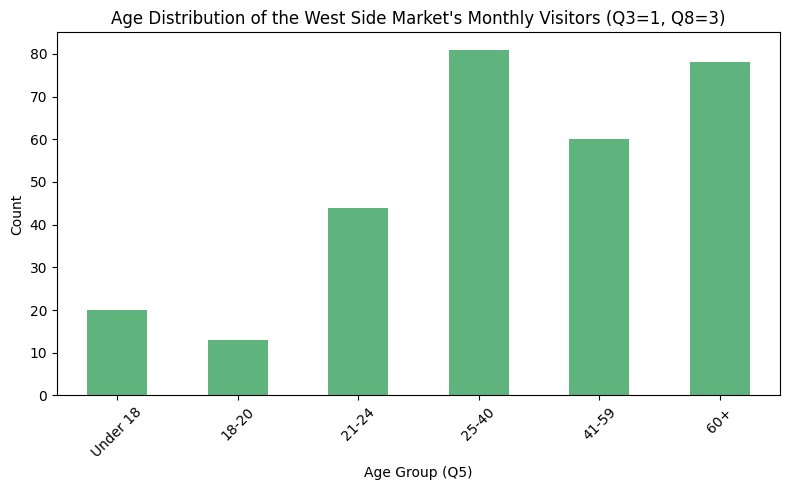

In [35]:
# Filter: Q3 = 1 ("I've been there") AND Q8 = 3 ("Monthly")
subset = df[(df['Q3'] == 1) & (df['Q8'] == 3)]
subset['Q5_label'] = subset['Q5'].map(q5_key)
age_counts = subset['Q5_label'].value_counts().reindex(q5_key.values(), fill_value=0)
age_counts
plt.figure(figsize=(8,5))
age_counts.plot(kind='bar', color='#5FB47E')
plt.title("Age Distribution of the West Side Market's Monthly Visitors (Q3=1, Q8=3)")
plt.xlabel("Age Group (Q5)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/4032093166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Q5_label'] = subset['Q5'].map(q5_key)


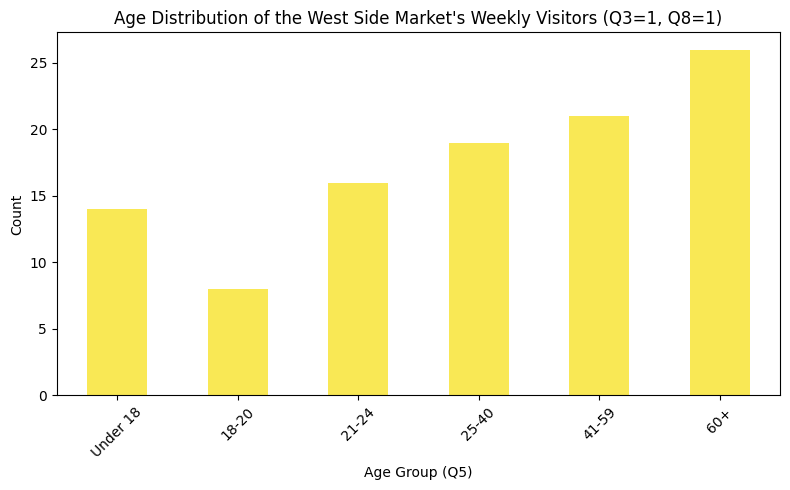

In [36]:
# Filter: Q3 = 1 ("I've been there") AND Q8 = 1 ("Weekly or more")
subset = df[(df['Q3'] == 1) & (df['Q8'] == 4)]
subset['Q5_label'] = subset['Q5'].map(q5_key)
age_counts = subset['Q5_label'].value_counts().reindex(q5_key.values(), fill_value=0)
age_counts
plt.figure(figsize=(8,5))
age_counts.plot(kind='bar', color='#F9E855')
plt.title("Age Distribution of the West Side Market's Weekly Visitors (Q3=1, Q8=1)")
plt.xlabel("Age Group (Q5)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#q8_key={1:"Once a year or less", 2:"A few times a year", 3:"Monthly",4:"Weekly or more"}

/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/782040940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Q5_label'] = subset['Q5'].map(q5_key)


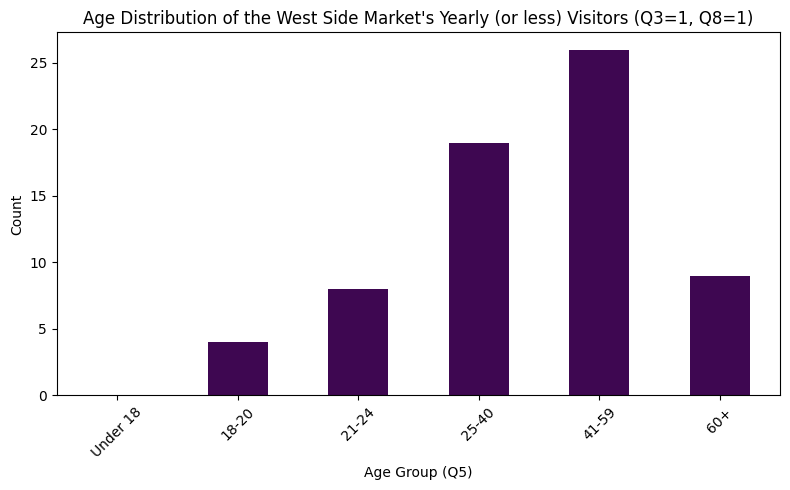

In [37]:
# Filter: Q3 = 1 ("I've been there") AND Q8 = 1 ("Once a year or less")
subset = df[(df['Q3'] == 1) & (df['Q8'] == 1)]
subset['Q5_label'] = subset['Q5'].map(q5_key)
age_counts = subset['Q5_label'].value_counts().reindex(q5_key.values(), fill_value=0)
age_counts
plt.figure(figsize=(8,5))
age_counts.plot(kind='bar', color='#3E0751')
plt.title("Age Distribution of the West Side Market's Yearly (or less) Visitors (Q3=1, Q8=1)")
plt.xlabel("Age Group (Q5)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#q8_key={1:"Once a year or less", 2:"A few times a year", 3:"Monthly",4:"Weekly or more"}

/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/1891099180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Q5_label'] = subset['Q5'].map(q5_key)


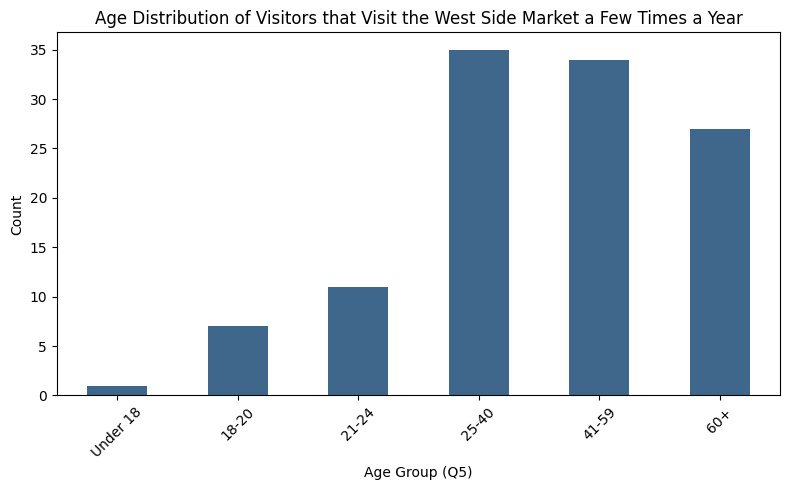

In [38]:
# Filter: Q3 = 1 ("I've been there") AND Q8 = 2 ("A few times a year")
subset = df[(df['Q3'] == 1) & (df['Q8'] ==2)]
subset['Q5_label'] = subset['Q5'].map(q5_key)
age_counts = subset['Q5_label'].value_counts().reindex(q5_key.values(), fill_value=0)
age_counts
plt.figure(figsize=(8,5))
age_counts.plot(kind='bar', color='#3F678B')
plt.title("Age Distribution of Visitors that Visit the West Side Market a Few Times a Year")
plt.xlabel("Age Group (Q5)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#q8_key={1:"Once a year or less", 2:"A few times a year", 3:"Monthly",4:"Weekly or more"}

<Figure size 1800x700 with 0 Axes>

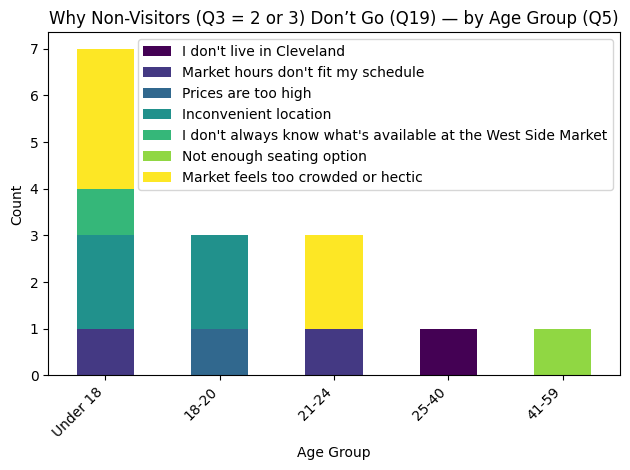

In [39]:
# Filter non-visitors (Q3 = 2 or 3)
non_visitors = df[df['Q3'].isin([2, 3])]

# Pivot table: Q5 (age groups) × Q19 (reasons)
pivot_q5_q19 = non_visitors.pivot_table(
    index='Q5',
    columns='Q19',
    aggfunc='size',
    fill_value=0
)

# Rename rows (age) and columns (reasons) using the key dicts
pivot_q5_q19.index = [q5_key[i] for i in pivot_q5_q19.index]       # Age labels
pivot_q5_q19.columns = [q19_key[i] for i in pivot_q5_q19.columns]   # Reason labels

# Plot
plt.figure(figsize=(18,7))
pivot_q5_q19.plot(kind='bar', stacked=True, colormap='viridis')

plt.title("Why Non-Visitors (Q3 = 2 or 3) Don’t Go (Q19) — by Age Group (Q5)")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1800x1000 with 0 Axes>

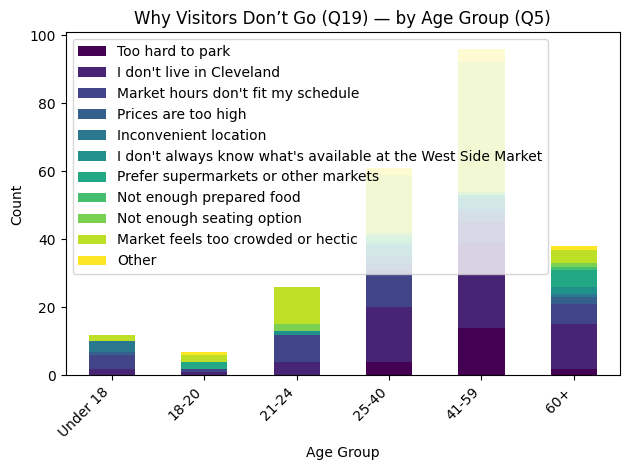

In [40]:
# Filter visitors (Q3 = 1)
visitors = df[df['Q3'].isin([1])]

# Pivot table: Q5 (age groups) × Q19 (reasons)
pivot_q5_q19 = visitors.pivot_table(
    index='Q5',
    columns='Q19',
    aggfunc='size',
    fill_value=0
)

# Rename rows (age) and columns (reasons) using the key dicts
pivot_q5_q19.index = [q5_key[i] for i in pivot_q5_q19.index]       # Age labels
pivot_q5_q19.columns = [q19_key[i] for i in pivot_q5_q19.columns]   # Reason labels

# Plot
plt.figure(figsize=(18,10))
pivot_q5_q19.plot(kind='bar', stacked=True, colormap='viridis')

plt.title("Why Visitors Don’t Go (Q19) — by Age Group (Q5)")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/2610045827.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_q5_labels, rotation=45, ha='right')
/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/2610045827.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_q5_labels, rotation=45, ha='right')
/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/2610045827.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_q5_labels, rotation=45, ha='right')


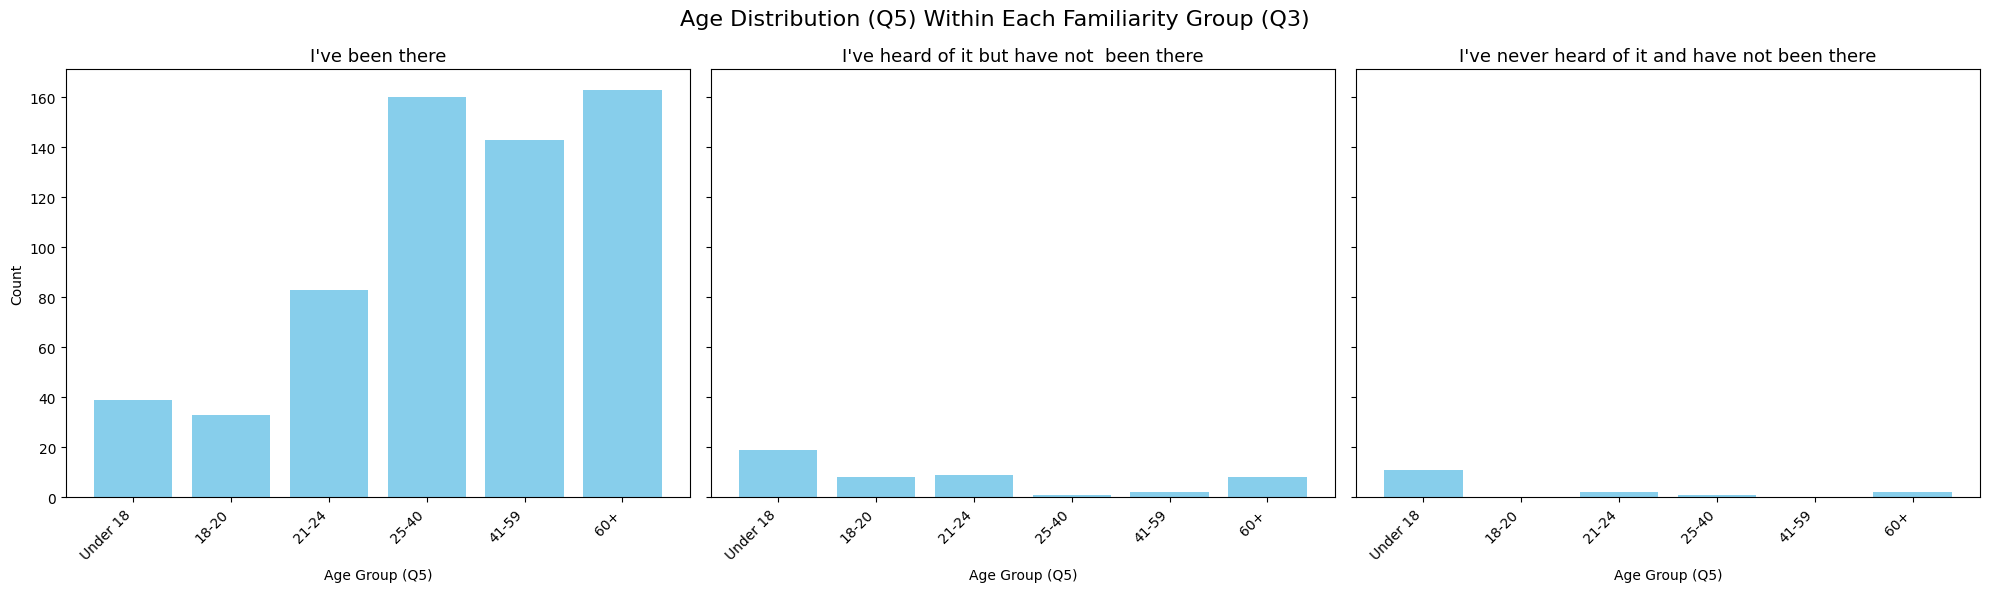

In [41]:
# Order of Q3 and Q5 categories
q3_values = [1, 2, 3]
q5_values = [1, 2, 3, 4, 5, 6]
q5_labels = [q5_key[i] for i in q5_values]

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for idx, q3_val in enumerate(q3_values):
    ax = axes[idx]
    
    # Filter for this familiarity group
    subset = df[df['Q3'] == q3_val]
    
    # Count age groups (ensure all appear)
    counts = subset['Q5'].value_counts().reindex(q5_values, fill_value=0)
    
    # Wrap x-axis labels
    wrapped_q5_labels = wrap_labels(q5_labels, width=10)

    # Plot
    ax.bar(wrapped_q5_labels, counts.values, color='skyblue')
    
    # Title based on familiarity
    ax.set_title(q3_key[q3_val], fontsize=13)
    ax.set_xlabel("Age Group (Q5)")
    ax.set_xticklabels(wrapped_q5_labels, rotation=45, ha='right')
    
    if idx == 0:
        ax.set_ylabel("Count")

plt.suptitle("Age Distribution (Q5) Within Each Familiarity Group (Q3)", fontsize=16)
plt.tight_layout()
plt.show()

Visit Frequency (Q8) vs Travel Mode (Q7):


,Driving,Public transit,Walking,Bike/Scooter
Once a year or less,48,4,12,2
A few times a year,80,7,27,1
Monthly,222,20,53,1
Weekly or more,75,9,19,1


<Figure size 1000x600 with 0 Axes>

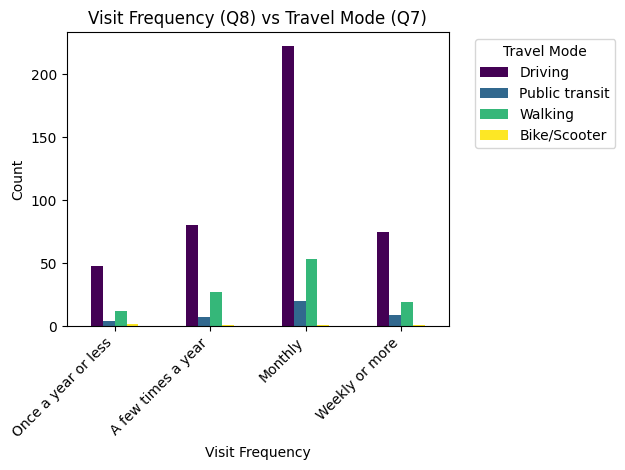


Visit Frequency (Q8) vs Income (Q34):


,"Less than $25,000","$25,000-$49,999","$50,000-$99,999","$100,000-$149,999","$150,000-$199,999","$200,000-$249,999","$250,000+",Prefer not to say
Once a year or less,0,5,16,9,6,4,2,18
A few times a year,5,8,16,12,10,14,8,18
Monthly,16,16,35,42,22,10,30,58
Weekly or more,4,8,10,7,14,3,5,26


<Figure size 1200x600 with 0 Axes>

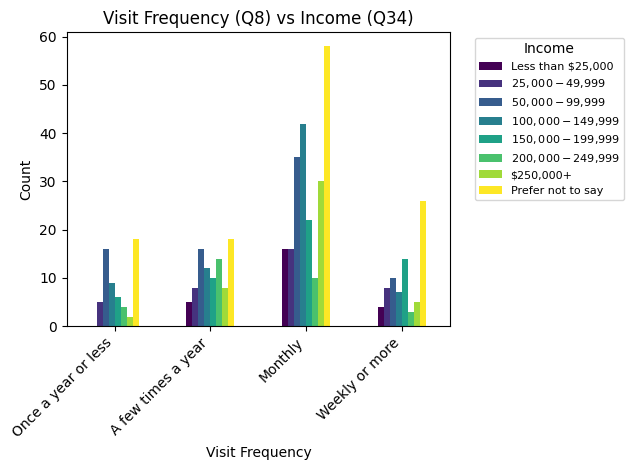


Last Visit (Q9) vs Visit Frequency (Q8):


,Once a year or less,A few times a year,Monthly,Weekly or more
Within the last week,63,24,15,5
Within the last month,3,88,87,8
Within the last year,0,3,187,49
More than a year ago,0,0,7,42


<Figure size 1000x600 with 0 Axes>

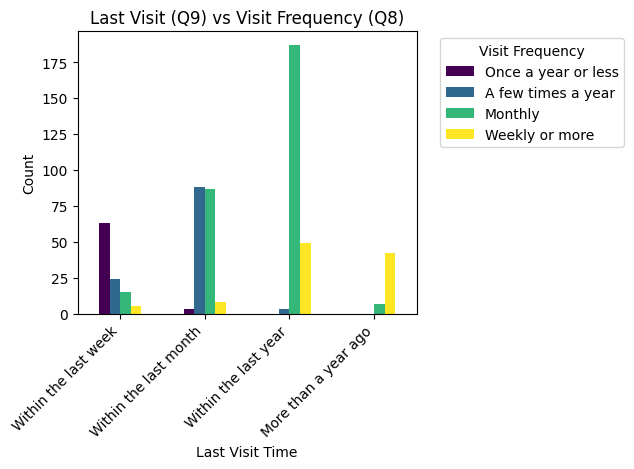


Travel Mode (Q7) vs Distance:


/var/folders/y0/hqzvd0zj4gd8wqkm8l5zck3c0000gn/T/ipykernel_64644/694315686.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  q7xdist = df.pivot_table(index='Q7', columns='distance_bin', aggfunc='size', fill_value=0)


distance_bin,0-5 miles,5-10 miles,10-20 miles,20-50 miles,50+ miles
Driving,168,104,53,46,54
Public transit,9,25,0,0,6
Walking,89,8,5,3,6
Bike/Scooter,3,1,0,0,1


<Figure size 1000x600 with 0 Axes>

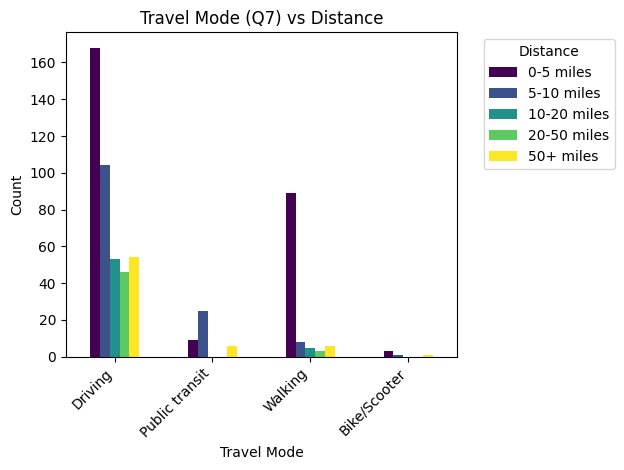


Travel Mode (Q7) vs Reasons for Not Visiting More Often (Q19) - Visitors Only:


,Too hard to park,I don't live in Cleveland,Market hours don't fit my schedule,Prices are too high,Inconvenient location,I don't always know what's available at the West Side Market,Prefer supermarkets or other markets,Not enough prepared food,Not enough seating option,Market feels too crowded or hectic,Other
Driving,20,56,26,4,5,6,7,3,4,62,6
Public transit,0,0,3,2,2,0,1,0,0,3,1
Walking,0,5,7,2,0,3,1,0,1,8,1
Bike/Scooter,0,0,0,0,0,0,0,0,0,1,0


<Figure size 1400x600 with 0 Axes>

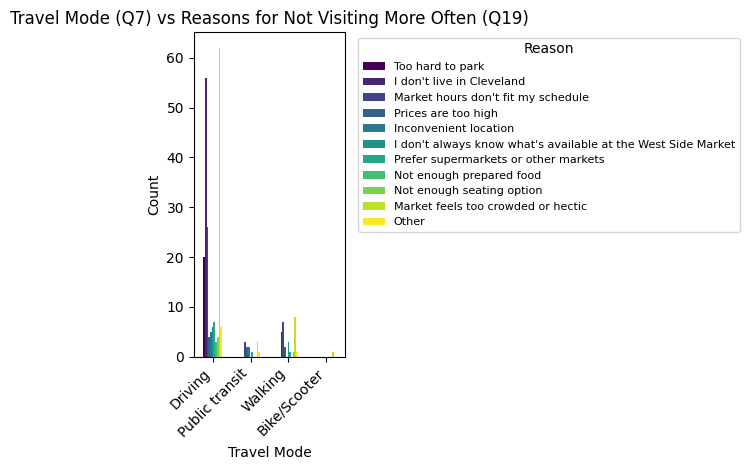


Spend per Visit (Q11) vs Visit Frequency (Q8):


,Once a year or less,A few times a year,Monthly,Weekly or more
Less than $20,10,23,59,29
$20-50,26,39,130,45
$50-100,19,34,75,20
More than $100,11,19,32,10


<Figure size 1000x600 with 0 Axes>

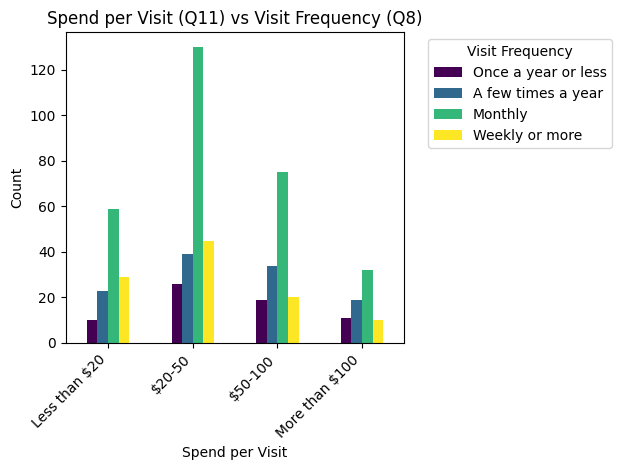


Spend per Visit (Q11) vs Age Group (Q5):


,Under 18,18-20,21-24,25-40,41-59,60+
Less than $20,19,11,12,12,4,63
$20-50,15,17,41,57,53,57
$50-100,1,3,20,62,49,13
More than $100,0,1,6,23,35,7


<Figure size 1000x600 with 0 Axes>

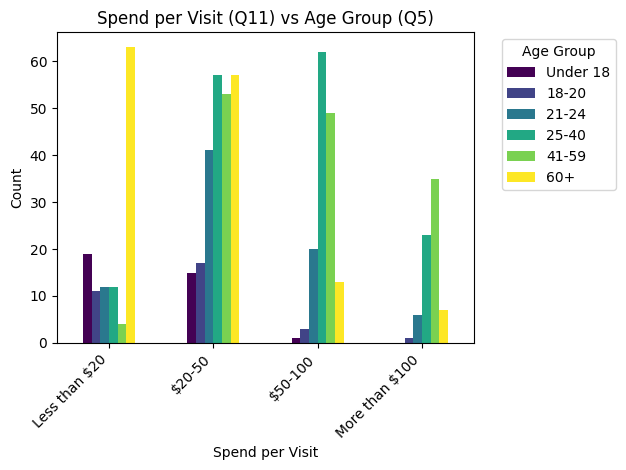


Spend per Visit (Q11) by Visit Frequency (Q8) and Age Group (Q5):


,Once a year or less - 18-20,Once a year or less - 21-24,Once a year or less - 25-40,Once a year or less - 41-59,Once a year or less - 60+,A few times a year - Under 18,A few times a year - 18-20,A few times a year - 21-24,A few times a year - 25-40,A few times a year - 41-59,...,Monthly - 21-24,Monthly - 25-40,Monthly - 41-59,Monthly - 60+,Weekly or more - Under 18,Weekly or more - 18-20,Weekly or more - 21-24,Weekly or more - 25-40,Weekly or more - 41-59,Weekly or more - 60+
Less than $20,0,2,1,2,5,1,2,0,3,0,...,6,5,2,30,8,3,4,3,0,11
$20-50,2,2,7,12,3,0,3,5,9,14,...,29,33,18,34,6,5,5,8,9,12
$50-100,1,2,6,10,0,0,2,4,16,11,...,8,34,22,10,0,0,6,6,6,2
More than $100,1,2,5,2,1,0,0,2,7,9,...,1,9,18,4,0,0,1,2,6,1


In [46]:
# 3. Visit behavior & travel patterns

# 3.1 How often do you visit (Q8) cross-tab with travel mode (Q7) and income (Q34)

# Q8 vs Q7 (Travel Mode)
q8xq7 = df.pivot_table(index='Q8', columns='Q7', aggfunc='size', fill_value=0)
q8xq7.index = [q8_key[i] for i in q8xq7.index]
q8xq7.columns = [q7_key[i] for i in q8xq7.columns]

print("Visit Frequency (Q8) vs Travel Mode (Q7):")
display(q8xq7)

plt.figure(figsize=(10, 6))
q8xq7.plot(kind='bar', colormap='viridis')
plt.title("Visit Frequency (Q8) vs Travel Mode (Q7)")
plt.ylabel("Count")
plt.xlabel("Visit Frequency")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Travel Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Q8 vs Q34 (Income)
q8xq34 = df.pivot_table(index='Q8', columns='Q34', aggfunc='size', fill_value=0)
q8xq34.index = [q8_key[i] for i in q8xq34.index]
q8xq34.columns = [q34_key[i] for i in q8xq34.columns]

print("\nVisit Frequency (Q8) vs Income (Q34):")
display(q8xq34)

plt.figure(figsize=(12, 6))
q8xq34.plot(kind='bar', colormap='viridis')
plt.title("Visit Frequency (Q8) vs Income (Q34)")
plt.ylabel("Count")
plt.xlabel("Visit Frequency")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# 3.2 When was the last time you visited (Q9) with Visit Frequency (Q8)
q9xq8 = df.pivot_table(index='Q9', columns='Q8', aggfunc='size', fill_value=0)
q9xq8.index = [q9_key[i] for i in q9xq8.index]
q9xq8.columns = [q8_key[i] for i in q9xq8.columns]

print("\nLast Visit (Q9) vs Visit Frequency (Q8):")
display(q9xq8)

plt.figure(figsize=(10, 6))
q9xq8.plot(kind='bar', colormap='viridis')
plt.title("Last Visit (Q9) vs Visit Frequency (Q8)")
plt.ylabel("Count")
plt.xlabel("Last Visit Time")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visit Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3.3 How do you travel to the market (Q7) cross-tab with distance and reasons for not visiting (Q19)

# Q7 vs Distance (categorical distance bins)
df['distance_bin'] = pd.cut(df['distance_miles'], bins=[0, 5, 10, 20, 50, float('inf')], 
                            labels=['0-5 miles', '5-10 miles', '10-20 miles', '20-50 miles', '50+ miles'])

q7xdist = df.pivot_table(index='Q7', columns='distance_bin', aggfunc='size', fill_value=0)
q7xdist.index = [q7_key[i] for i in q7xdist.index]

print("\nTravel Mode (Q7) vs Distance:")
display(q7xdist)

plt.figure(figsize=(10, 6))
q7xdist.plot(kind='bar', colormap='viridis')
plt.title("Travel Mode (Q7) vs Distance")
plt.ylabel("Count")
plt.xlabel("Travel Mode")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Distance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Q7 vs Q19 (Reasons for not visiting) - Note: Q19 is multi-select, so we need to handle it differently
# For simplicity, we'll look at the primary reason or create a binary indicator
# Let's create a cross-tab for visitors (Q3=1) who have Q19 responses
visitors_with_barriers = df[(df['Q3'] == 1) & (df['Q19'].notna())].copy()

# Convert Q19 to string and split if it contains multiple values
visitors_with_barriers['Q19_primary'] = visitors_with_barriers['Q19'].astype(str).str.split(',').str[0].astype(float)

q7xq19 = visitors_with_barriers.pivot_table(index='Q7', columns='Q19_primary', aggfunc='size', fill_value=0)
q7xq19.index = [q7_key[i] for i in q7xq19.index]
q7xq19.columns = [q19_key[i] for i in q7xq19.columns]

print("\nTravel Mode (Q7) vs Reasons for Not Visiting More Often (Q19) - Visitors Only:")
display(q7xq19)

plt.figure(figsize=(14, 6))
q7xq19.plot(kind='bar', colormap='viridis')
plt.title("Travel Mode (Q7) vs Reasons for Not Visiting More Often (Q19)")
plt.ylabel("Count")
plt.xlabel("Travel Mode")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# 3.4 Spend per visit (Q11) with visit frequency (Q8) & Age group (Q5)

# Q11 vs Q8
q11xq8 = df.pivot_table(index='Q11', columns='Q8', aggfunc='size', fill_value=0)
q11xq8.index = [q11_key[i] for i in q11xq8.index]
q11xq8.columns = [q8_key[i] for i in q11xq8.columns]

print("\nSpend per Visit (Q11) vs Visit Frequency (Q8):")
display(q11xq8)

plt.figure(figsize=(10, 6))
q11xq8.plot(kind='bar', colormap='viridis')
plt.title("Spend per Visit (Q11) vs Visit Frequency (Q8)")
plt.ylabel("Count")
plt.xlabel("Spend per Visit")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visit Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Q11 vs Q5 (Age Group)
q11xq5 = df.pivot_table(index='Q11', columns='Q5', aggfunc='size', fill_value=0)
q11xq5.index = [q11_key[i] for i in q11xq5.index]
q11xq5.columns = [q5_key[i] for i in q11xq5.columns]

print("\nSpend per Visit (Q11) vs Age Group (Q5):")
display(q11xq5)

plt.figure(figsize=(10, 6))
q11xq5.plot(kind='bar', colormap='viridis')
plt.title("Spend per Visit (Q11) vs Age Group (Q5)")
plt.ylabel("Count")
plt.xlabel("Spend per Visit")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Combined: Q11 vs Q8 and Q5 (three-way analysis)
print("\nSpend per Visit (Q11) by Visit Frequency (Q8) and Age Group (Q5):")
q11xq8xq5 = df.pivot_table(index='Q11', columns=['Q8', 'Q5'], aggfunc='size', fill_value=0)
q11xq8xq5.index = [q11_key[i] for i in q11xq8xq5.index]
# Flatten column names for display
q11xq8xq5.columns = [f"{q8_key[col[0]]} - {q5_key[col[1]]}" for col in q11xq8xq5.columns]
display(q11xq8xq5.head(10))  # Show first 10 columns to avoid overwhelming output


# 3. Visit behavior & travel patterns

**How often do you visit? (Q8)**
* Bar chart of categories (weekly, monthly, rarely, etc.).
* Cross-tab with:
    * Familiarity.
    * Impression.
    * Age group.
    * Student vs non-student.
    * Travel mode.
    * Income.

**When was the last time you visited? (Q9)**
* Distribution (within week, month, year, never).
* Combine with frequency to spot inconsistencies (e.g., says “weekly” but last visit “more than a year ago”).

**How do you typically travel to the market? (Q7)**
* Mode split (car, walking, bus, bike, rideshare, etc.).
* Cross-tab with:
    * Distance (via ZIP or Lat/Long).
    * Age group.
    * Student vs non-student.
    * Household income.
    * Reasons for not visiting (parking, accessibility).

**Spend per visit (Q11)**
* Distribution (histogram / boxplot).
* Compare median/mean spend across:
    * Visit frequency.
    * Age group.
    * Student vs non-student.
    * Household income.
    * Impression and satisfaction.

**Exploring vs going to specific vendors (Q12)**
* Share who “explores stalls” vs “goes straight to specific vendors”.
* Cross-tab with:
    * Visit frequency (do regulars beeline more?).
    * Spend per visit (explorers vs targeted shoppers).
    * Satisfaction & impression.

# 4. Satisfaction & Experience Inside the Market

**4.1 Satisfaction Distributions**
- Analyze distributions for:
  - Product variety  
  - Cleanliness  
  - Vendor interactions  
  - Parking / accessibility  
  - Value for money  
- Compute:
  - Mean, median, mode  
  - % satisfied vs neutral vs dissatisfied  
- Visuals:
  - Side-by-side bar charts  
  - Radar chart of satisfaction dimensions  

**4.2 Compare Satisfaction Dimensions**
- Identify which dimensions rank highest or lowest.
- Check if issues like cleanliness or parking consistently score lower.

**4.3 Satisfaction vs Demographics**
Compare each satisfaction metric across:
- Age groups  
- Gender  
- Race  
- Household income  
- Student vs non-student  
- Household size  

**4.4 Satisfaction vs Behavior**
Analyze satisfaction as a function of:
- Visit frequency  
- Spend per visit  
- Travel mode  
- Whether they explore stalls or visit specific vendors  
- Grocery delivery usage  

**4.5 Dissatisfaction Follow-Up (Open Text)**
For respondents who reported “somewhat/extremely dissatisfied”:
- Thematic coding of explanations  
- Identify top themes  
- Compare themes across demographics  
- Connect themes back to specific satisfaction dimensions

# 5. Other Public Markets & Comparisons

**5.1 Visits to Other Markets**
- Proportion who have visited other markets  
- Breakdown of which markets (open text)  
- Compare visitors vs non-visitors on:
  - Satisfaction at WSM  
  - Visit frequency  
  - Spend per visit  
  - Event/program interest  

**5.2 Reasons for Shopping at Public Markets**(Multi-Select)
- % selecting each motivator  
- Group motivations into themes:
  - Freshness  
  - Community  
  - Cultural experience  
  - Price/value  
- Compare motivations by:
  - Age  
  - Student status  
  - Visit frequency  

**5.3 Likes/Dislikes About Other Markets (Open Text)**
- Thematic coding  
- Identify common features of successful markets  
- Compare criticisms of other markets with WSM’s issues  

# 6. Motivations & Barriers for the West Side Market

**6.1 Motivations (Multi-Select)**
- % selecting each reason for visiting  
- Compare motivations across:
  - Spend per visit  
  - Visit frequency  
  - Age  
  - Student vs non-student  

**6.1.1 Additional Motivations (Open Text)**
- Code unique motivations (e.g., history, atmosphere)

**6.2 Barriers (Multi-Select)**
- % selecting each barrier:
  - Parking  
  - Distance  
  - Hours  
  - Pricing  
  - Accessibility  
  - Convenience  
- Cross-tabs:
  - Frequent vs infrequent visitors  
  - Visitors vs non-visitors  
  - Travel mode  
  - Student status  
  - Household income  

**6.2.1 Additional Barriers (Open Text)**
- Identify themes not captured by predefined categories  

# OTHERS

# 7. Student-Focused Analysis

## 7.1 Student vs Non-Student
- Proportion of student respondents  
- Compare:
  - Visit frequency  
  - Typical spend  
  - Travel mode  
  - Event interest levels  
  - Volunteer/donor interest  
  - Grocery delivery usage  

## 7.2 Breakdown by School
- Distribution across schools (CWRU, CSU, Tri-C, etc.)
- Compare student subgroups by:
  - Visit patterns  
  - Event interest  
  - Spending behavior  

---

# 8. Programming & Event Interest

## 8.1 Interest Levels (Top-2-Box)
Calculate % “Very interested” + “Somewhat interested” for:
- Live music  
- Seasonal food festivals  
- Cooking/nutrition classes  
- Family-friendly events  
- Evening happy hours  
- Cultural celebrations  
- Loyalty/rewards program  
- Meal/grocery delivery  

Rank programs from most to least appealing.

## 8.2 Segment-Level Insights
Compare interest levels by:
- Age group  
- Household size  
- Student vs non-student  
- Frequent vs infrequent visitors  

## 8.3 Event Interest Clustering
Identify clusters such as:
- Entertainment-focused  
- Education-focused  
- Convenience-focused  
- Family-oriented  

## 8.4 Event Suggestions (Open Text)
- Thematic coding of new ideas not provided in survey options  

---

# 9. Timing & Logistics

## 9.1 Best Days to Visit (Multi-Select)
- Count and rank preferred days of the week  
- Cross-analyze with:
  - Visit frequency  
  - Student status  
  - Work/school patterns  

---

# 10. Service & Product Experience

## 10.1 Vendor Interactions (Open Text)
- Classify as positive / neutral / negative  
- Identify recurring themes (friendliness, rudeness, quality, etc.)
- Compare themes across:
  - Demographics  
  - Satisfaction scores  

## 10.2 Product Experiences (Open Text)
- Categorize by:
  - Freshness  
  - Pricing  
  - Quality issues  
  - Unique finds  
- Link themes with satisfaction and spend levels  

## 10.3 Additional Comments (Open Text)
- Capture broader sentiments  
- Identify repeated suggestions or criticisms  

---

# 11. Grocery Shopping & Prepared Food Habits

## 11.1 Grocery Delivery Usage
- Frequency distribution  
- Compare:
  - Visit frequency  
  - Demographics  
  - Interest in meal/grocery delivery programs  

## 11.2 Grocery Store Choices (Multi-Select)
Compute % who shop at:
- Walmart  
- Aldi  
- Giant Eagle  
- Heinen’s  
- Dave’s  
- Farmers’ markets  
- West Side Market  
- Fairfax Market  

Compare patterns between:
- WSM shoppers vs non-WSM shoppers  
- Different demographic groups  

## 11.3 Prepared Food Sources (Multi-Select)
Analyze % using:
- Restaurants/takeout  
- DoorDash/Grubhub/etc.  
- Grocery store hot bars  
- WSM prepared foods  
- Meal prep services  

Cross-tab with:
- Event interest levels  
- Visit frequency  
- Age/student status  

---

# 12. Communication & Outreach

## 12.1 How Respondents Hear About Local Events
- % selecting each channel (social media, word of mouth, email, etc.)
- Analyze differences by:
  - Age  
  - Student status  
  - Event interest clusters  

## 12.2 Open Text (“Other” Sources)
- Code emerging channels (e.g., neighborhood Facebook groups, campus bulletin boards)

## 12.3 Email & Contact Permissions
- % who provided email  
- % willing to be contacted  
- Identify high-value segments:
  - Frequent visitors  
  - High satisfaction  
  - High event interest  
  - Potential volunteers/donors  

---

# 13. Demographic Analysis

## 13.1 Basic Distributions
Summaries for:
- Household size  
- Household income  
- Gender  
- Race  

## 13.2 Demographics vs Behavior
Compare demographic groups on:
- Visit frequency  
- Spend per visit  
- Satisfaction  
- Event interest  
- Grocery habits  

## 13.3 Intersectional Insights
Examples:
- Low-income frequent visitors vs high-income infrequent visitors  
- Students of color vs non-students  
- Larger households vs singles  

---

# 14. Advanced Exploratory Ideas

## 14.1 Factor Analysis / PCA
- Satisfaction items → latent factors  
- Event interest items → clusters of preferences  

## 14.2 Behavioral Segmentation / Clustering
Potential clusters:
- Local loyalists  
- Occasional tourists  
- Price-sensitive shoppers  
- Convenience-driven shoppers  

## 14.3 Predictive Explorations
(Still exploratory, not causal)
- Predict satisfaction using demographics + behavior  
- Predict event interest using shopping habits + visit frequency  